### 선형회귀기반의 분류 알고리즘 학습 - LogisticRegression

- 이진분류 및 다중분류 가능
- 분류지만 선형회귀식기반의 알고리즘이라서 Regresion

[1] 데이터 준비 및 확인<hr>

In [15]:
## [1-1] 모듈로딩 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [16]:
pd.set_option("future.no_silent_downcasting", True)

In [17]:
##  [1-2] 데이터 준비
filename='../Data/iris.csv'

In [18]:
## - 데이터 로딩 
irisDF= pd.read_csv(filename)

irisDF.head(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


[2] 데이터 확인<hr>

In [19]:
## [2-1] 2개 품종만 추출 
## - 품종 확인
irisDF.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [20]:
## - 2개 품종 즉, 'Setosa', 'Versicolor' 추출
dataDF=irisDF[irisDF.variety != 'Virginica'].copy()
dataDF.shape

(100, 5)

In [21]:
## - 꽃잎 길이와 너비(petal.length, petal.width) 특성만 추출
dataDF=dataDF[dataDF.columns[2:]].copy()

print(f'shape : {dataDF.shape}')

shape : (100, 3)


In [22]:
labelToNum={'Setosa' : 0, 'Versicolor':1}
dataDF['variety_no']=dataDF.variety.replace(labelToNum )

In [23]:
dataDF.head(3)

,petal.length,petal.width,variety,variety_no
0,1.4,0.2,Setosa,0
1,1.4,0.2,Setosa,0
2,1.3,0.2,Setosa,0


In [24]:
dataDF.corr(numeric_only=True)

,petal.length,petal.width
petal.length,1.000000,0.979322
petal.width,0.979322,1.000000


[3] 기계학습 준비 <hr>

- 피쳐/특성/독립과 타겟/클래스/종속변수 분리

In [25]:
featureDF = dataDF[dataDF.columns[:2]]
classDF = dataDF.variety

In [26]:
print(f'featureDF : {featureDF.shape}  classDF : {classDF.shape}')

featureDF : (100, 2)  classDF : (100,)


- 훈련용/테스트용 분리

In [27]:
train_X, test_X, train_y, test_y = train_test_split(featureDF, classDF,
                                                    random_state=7,
                                                    test_size=0.2,
                                                    stratify=classDF)

- 특성/피쳐 2개에 대한 스케일링 진행

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

scaler.fit(train_X)

StandardScaler()

In [30]:
# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X = scaler.transform(train_X)
test_scaled_X = scaler.transform(test_X)

#### [3] 학습 
- 메인학습 : 지도학습 - 분류
- 세부학습 : 선형모델 로지스틱회귀

In [31]:
# 학습모델 객체
logR=LogisticRegression()

In [32]:
# 학습 진행 ==> 훈련용 데이터 진행 fit(2D, 1D)
logR.fit(train_scaled_X, train_y)

LogisticRegression()

In [33]:
# 학습 진행 후 설정되는 매개변수/파라미터 ===> 모델 파라미터 
# 파라메타명_
logR.classes_

array(['Setosa', 'Versicolor'], dtype=object)

In [34]:
logR.coef_

array([[2.03218022, 1.8833978 ]])

In [35]:
logR.intercept_

array([0.25012681])

#### [4] 성능평가
- 이유 : 모델이 제대로 잘 만들어 졌는지 확인
- 과대적합/과소적합 체크
    * 과대적합/과적합/오버피팅(Overfitting) : 훈련 점수 > 테스트 점수
    * 과소적합/언더피팅(Underfitting) : 훈련과 테스트 점수 모두 낮음
    * 최적적합 : 훈련 점수와 테스트 점수 비슷 높은 점수 

- 점수 : 정확도(accuary_score)

In [36]:
train_score=logR.score(train_scaled_X, train_y)
test_score= logR.score(test_scaled_X, test_y)

In [37]:
print(f'train_score : {train_score}, test_score  : {test_score}')

train_score : 1.0, test_score  : 1.0


- 분류용 성능지표 ==>  sklearn.metrics 모듈

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [39]:
# 테스트 데이터기반으로 예측값 추출
y_pred=logR.predict(test_scaled_X)

y_pred

array(['Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Setosa'],
      dtype=object)

- [정밀도 점수] 

In [40]:
precision_score(test_y, y_pred, pos_label='Versicolor')

1.0

In [41]:
recall_score(test_y, y_pred, pos_label='Versicolor')

1.0

In [42]:
f1_score(test_y, y_pred, pos_label='Versicolor')

1.0

In [43]:
print( classification_report(test_y, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



- 오차확인 : 손실/비용함수 => 알고리즘 마다 다름 log_loss()

In [44]:
from sklearn.metrics import log_loss

In [45]:
#np.set_printoptions(precision=10, suppress=True)

In [46]:
# numpy에서의 DataFrame의 replace()와 동일 기능 변경 
test_y_ = np.where(test_y=='Versicolor', 1, 0)
y_pred_ = np.where(y_pred=='Versicolor', 1, 0)

loss = log_loss(test_y_, y_pred_)
print(f'loss : {loss :.6f}')

loss : 0.000000


In [47]:
test_scaled_X[:5]

array([[ 0.97914317,  0.89577134],
       [-0.80423494, -0.50936017],
       [ 1.25350904,  1.07141278],
       [ 0.08745412,  0.54448846],
       [-1.01000933, -1.03628449]])

In [48]:
logR.coef_[0][0], logR.coef_[0][1]

(np.float64(2.03218022179725), np.float64(1.88339779845386))

In [49]:
test_scaled_X.shape, test_scaled_X[0][0]

((20, 2), np.float64(0.9791431743724928))

In [50]:
test_scaled_X[:,0], test_scaled_X[:,1]

(array([ 0.97914317, -0.80423494,  1.25350904,  0.08745412, -1.01000933,
         1.11632611, -1.14719227, -0.94141787, -0.94141787,  0.29322852,
         1.11632611,  0.43041145, -0.94141787, -0.8728264 ,  1.25350904,
         1.18491757, -1.01000933, -0.667052  ,  0.84196024, -1.01000933]),
 array([ 0.89577134, -0.50936017,  1.07141278,  0.54448846, -1.03628449,
         1.42269566, -1.03628449, -1.03628449, -0.86064305,  0.36884702,
         1.24705422,  0.36884702, -1.03628449, -1.03628449,  0.7201299 ,
         1.07141278, -1.03628449, -0.68500161,  0.89577134, -1.03628449]))

In [51]:
# 회귀식 ----------------------------------------------
y=logR.coef_[0][0]*test_scaled_X[:, 0]+ \
  logR.coef_[0][1]*test_scaled_X[:, 1]+ \
  logR.intercept_

In [52]:
y

array([ 3.92701598, -2.34355135,  4.81537956,  1.45333771, -3.75413011,
        5.19820452, -4.03291055, -3.61473989, -3.28393719,  1.54070568,
        4.86740182,  1.81948612, -3.61473989, -3.47534967,  4.15377416,
        4.67598934, -3.75413011, -2.39557361,  3.64823554, -3.75413011])

In [53]:
logR.decision_function(test_scaled_X)

array([ 3.92701598, -2.34355135,  4.81537956,  1.45333771, -3.75413011,
        5.19820452, -4.03291055, -3.61473989, -3.28393719,  1.54070568,
        4.86740182,  1.81948612, -3.61473989, -3.47534967,  4.15377416,
        4.67598934, -3.75413011, -2.39557361,  3.64823554, -3.75413011])

In [54]:
from scipy.special import expit

In [55]:
# 확률값 추출 함수 => 양성확률값 추출 
sig_values = expit(y)
sig_values

array([0.98067831, 0.08757971, 0.991961  , 0.81051158, 0.02288483,
       0.9945039 , 0.01741405, 0.02621804, 0.03612637, 0.82356729,
       0.99236541, 0.86050445, 0.02621804, 0.0300218 , 0.9845378 ,
       0.99076969, 0.02288483, 0.08351085, 0.97462369, 0.02288483])

In [56]:
# 0번째와 4번째 요소 데이터 입력 후 예측
# predict() 메서드
logR.predict(test_scaled_X[[0, 4]])

array(['Versicolor', 'Setosa'], dtype=object)

In [57]:
# 0번째와 4번째 요소 데이터 입력 후 음성 , 양성에 대한 확률값
# predict_proba() 메서드 
logR.predict_proba(test_scaled_X[[0, 4]])

array([[0.01932169, 0.98067831],
       [0.97711517, 0.02288483]])

In [58]:
# 정답 결과값 ---------------------------------------------
test_y_[[0,4]], test_y.iloc[[0,4]]

(array([1, 0]),
 97    Versicolor
 4         Setosa
 Name: variety, dtype: object)

In [59]:
test_scaled_X[:, 0]

array([ 0.97914317, -0.80423494,  1.25350904,  0.08745412, -1.01000933,
        1.11632611, -1.14719227, -0.94141787, -0.94141787,  0.29322852,
        1.11632611,  0.43041145, -0.94141787, -0.8728264 ,  1.25350904,
        1.18491757, -1.01000933, -0.667052  ,  0.84196024, -1.01000933])

In [60]:
train_scaled_X_ = np.sort(train_scaled_X, axis=0)

#pre_y=logR.decision_function(train_scaled_X)

In [61]:
train_scaled_X_

array([[-1.2843752 , -1.21192593],
       [-1.21578373, -1.21192593],
       [-1.14719227, -1.21192593],
       [-1.0786008 , -1.21192593],
       [-1.0786008 , -1.21192593],
       [-1.0786008 , -1.03628449],
       [-1.0786008 , -1.03628449],
       [-1.0786008 , -1.03628449],
       [-1.0786008 , -1.03628449],
       [-1.0786008 , -1.03628449],
       [-1.01000933, -1.03628449],
       [-1.01000933, -1.03628449],
       [-1.01000933, -1.03628449],
       [-1.01000933, -1.03628449],
       [-1.01000933, -1.03628449],
       [-1.01000933, -1.03628449],
       [-1.01000933, -1.03628449],
       [-1.01000933, -1.03628449],
       [-1.01000933, -1.03628449],
       [-1.01000933, -1.03628449],
       [-0.94141787, -1.03628449],
       [-0.94141787, -1.03628449],
       [-0.94141787, -1.03628449],
       [-0.94141787, -1.03628449],
       [-0.94141787, -1.03628449],
       [-0.94141787, -1.03628449],
       [-0.94141787, -1.03628449],
       [-0.94141787, -0.86064305],
       [-0.94141787,

In [62]:
arr = np.array([[4, 3, 5], [6, 1, 2], [9, 7, 8], [11, 10, 12]])
print(arr)
print(np.sort(arr, axis=1))

[[ 4  3  5]
 [ 6  1  2]
 [ 9  7  8]
 [11 10 12]]
[[ 3  4  5]
 [ 1  2  6]
 [ 7  8  9]
 [10 11 12]]


In [63]:
train_scaled_X[:, 0].shape, sig_values.shape

((80,), (20,))

In [64]:
lineData = pd.DataFrame({'length':test_scaled_X[:, 0], 'value':sig_values})
lineData.sort_values(by='length', inplace=True)

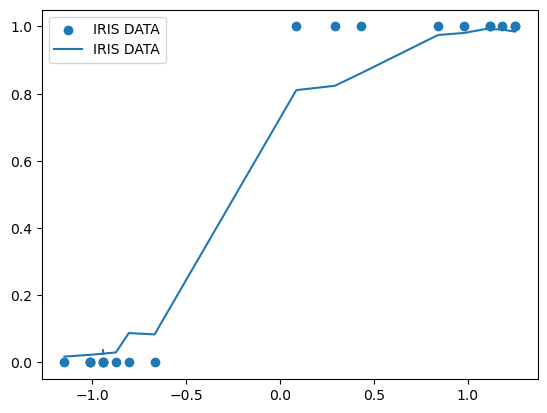

In [65]:
train_y_ = np.where(train_y=='Versicolor', 1, 0)

plt.scatter(test_scaled_X[:, 0], test_y_, label='IRIS DATA')
plt.plot(lineData.length, lineData.value, label='IRIS DATA')

plt.legend()
#plt.plot(test_X['petal.length'], sig_values)

In [66]:
test_scaled_X[:, 0]

array([ 0.97914317, -0.80423494,  1.25350904,  0.08745412, -1.01000933,
        1.11632611, -1.14719227, -0.94141787, -0.94141787,  0.29322852,
        1.11632611,  0.43041145, -0.94141787, -0.8728264 ,  1.25350904,
        1.18491757, -1.01000933, -0.667052  ,  0.84196024, -1.01000933])